# Data Science Class with Onoja Anthony, PhD (Email: donmaston09@gmail.com) 
Follow our Page on FaceBook: DataEdge Academy

Subscribe to our YouTube channel: @tonyonoja7880

Note: to run this script, you have to install the relevant Python packages and the datasets. Ensure to type "!pip install" in the Command Prompt (cmd) to install them . These includes: 

- pandas 
- numpy 
- scikit-learn 
- matplotlib 
- seaborn

## 1) Regression Example 

The Boston Housing dataset is a classic dataset used in regression analysis and machine learning. It contains information about housing prices in the suburbs of Boston, collected in the 1970s. Each record in the dataset represents a suburb (or town) and includes various features that describe the area, such as:

- CRIM: Per capita crime rate by town.

- ZN: Proportion of residential land zoned for large lots.

- INDUS: Proportion of non-retail business acres per town.

- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

- NOX: Nitric oxides concentration (parts per 10 million).

- RM: Average number of rooms per dwelling.

- AGE: Proportion of owner-occupied units built prior to 1940.

- DIS: Weighted distances to five Boston employment centers.

- RAD: Index of accessibility to radial highways.

- TAX: Full-value property tax rate per $10,000.

- PTRATIO: Pupil-teacher ratio by town.

- B: Proportion of Black residents by town.

- LSTAT: Percentage of lower status of the population.

- MEDV: Median value of owner-occupied homes in $1000s (target variable).

Goal: The goal of this study is to predict the median value of owner-occupied homes (MEDV) based on the given features.

### Step 1: Load the Dataset

In [1]:
# Load all the necessary packages 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # Python package for visualizations 

In [2]:
# Load the dataset using the raw URL
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(data_url) 
#path="/Users/Hp/Downloads/"
#df = pd.read_csv(path+"BostonHousing.csv", delimiter=',', quotechar='"',  encoding='latin-1')

# Display the first few rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 2: Understand the Dataset

In [3]:
print("Dataset Shape:", df.shape)  # Check dimensions
print("\nColumn Names:\n", df.columns)  # Inspect column names
print("\nData Types:\n", df.dtypes)  # Check data types
print("\nMissing Values:\n", df.isnull().sum())  # Check for missing values

Dataset Shape: (506, 14)

Column Names:
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Data Types:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


### Step 2: Summarize the Data

In [4]:
print("\nDescriptive Statistics:\n", df.describe())  # Descriptive statistics


Descriptive Statistics:
              crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
s

### Step 3: Visualize the Data

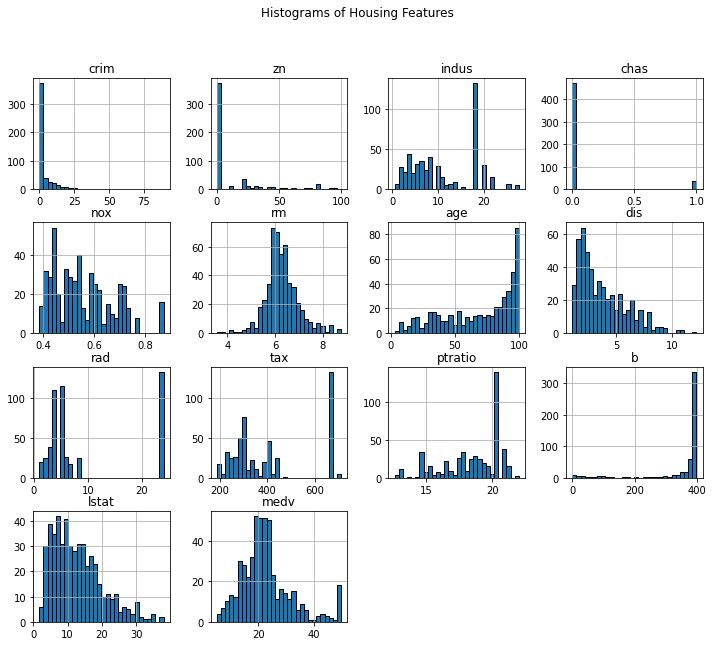

In [5]:
# Histograms for numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Histograms of Housing Features")
plt.show()

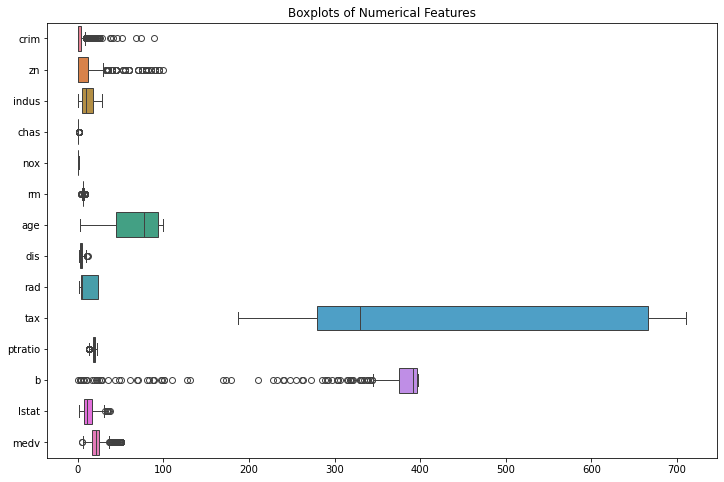

In [6]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Numerical Features")
plt.show()

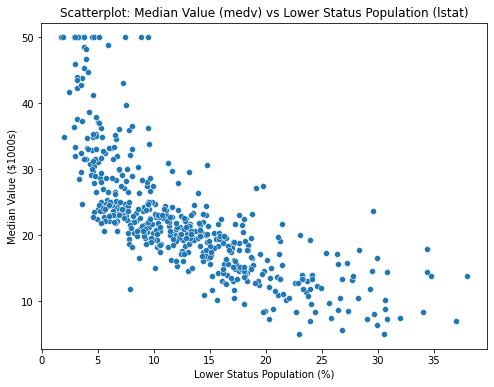

In [7]:
# Scatterplot to visualize relationships (e.g., 'medv' vs 'lstat')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lstat', y='medv', data=df)
plt.title("Scatterplot: Median Value (medv) vs Lower Status Population (lstat)")
plt.xlabel("Lower Status Population (%)")
plt.ylabel("Median Value ($1000s)")
plt.show()

### Step 4: Check for Correlations

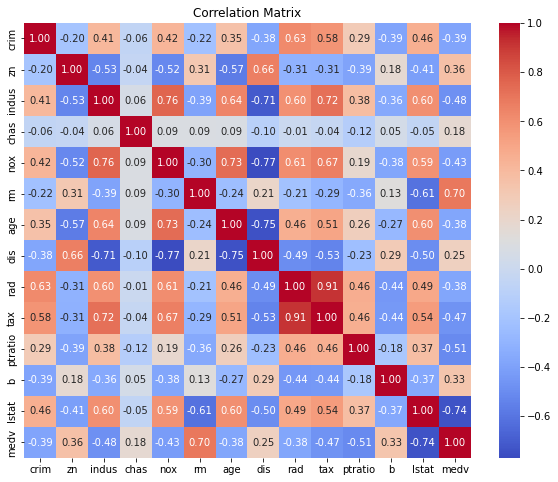

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Step 5: Identify Outliers

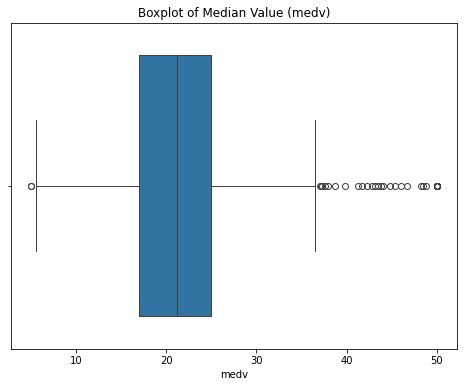

In [9]:
# Boxplot for 'medv' (target variable)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['medv'])
plt.title("Boxplot of Median Value (medv)")
plt.show()

### Modelling Phase - Regression Analysis

**Steps for Regression Analysis:**

  1) Prepare the Data:

      - Split the dataset into features (X) and target (y).

      - Split the data into training and testing sets.
  

  2) Train the Model: 
  
      - Use LinearRegression from scikit-learn to train the model.

      - Evaluate the Model:


  3) Make predictions on the test set.

      - Evaluate the model using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

      - Visualize the Results:

      - Plot the predicted vs actual values.



### Step 1: Prepare the Data

In [10]:
# Features (X) and target (y)
X = df.drop('medv', axis=1)  # All columns except 'medv'
y = df['medv']  # Target variable

In [11]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Train the Model

In [12]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

### Step 3: Evaluate the Model


In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 24.291119474973538
Root Mean Squared Error (RMSE): 4.928602182665339
R-squared (R2): 0.6687594935356317


### Step 4: Visualize the Results

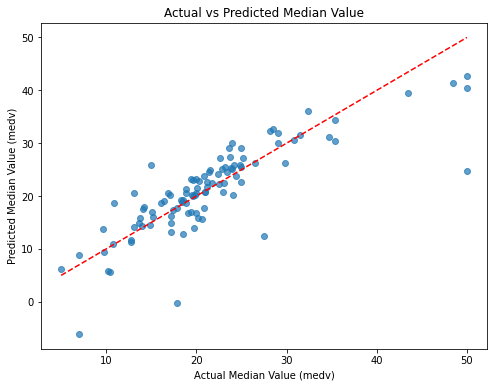

In [15]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Median Value (medv)")
plt.ylabel("Predicted Median Value (medv)")
plt.title("Actual vs Predicted Median Value")
plt.show()

### Evaluate the problem using Non-linear Models 

In [16]:
# Load Python packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Step 2: Train and Evaluate Decision Tree Regression

In [17]:
# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

In [18]:
# Fit the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [20]:
# Calculate evaluation metrics for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [21]:
print("Decision Tree Regression Metrics:")
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R2):", r2_dt)
print()

Decision Tree Regression Metrics:
Mean Squared Error (MSE): 10.416078431372549
Root Mean Squared Error (RMSE): 3.2273949915330395
R-squared (R2): 0.8579634380978161



### Step 3: Visualize the Results


Text(0.5, 1.0, 'Decision Tree Regression: Actual vs Predicted')

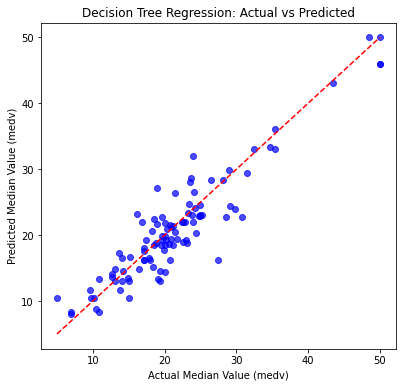

In [22]:
# Plot predicted vs actual values for both models
plt.figure(figsize=(14, 6))

# Decision Tree Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Median Value (medv)")
plt.ylabel("Predicted Median Value (medv)")
plt.title("Decision Tree Regression: Actual vs Predicted")

In [23]:
### Visualise the decision tree nodes 

# Load the packages 
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
import graphviz

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)  # Limit depth to 3

# Fit the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

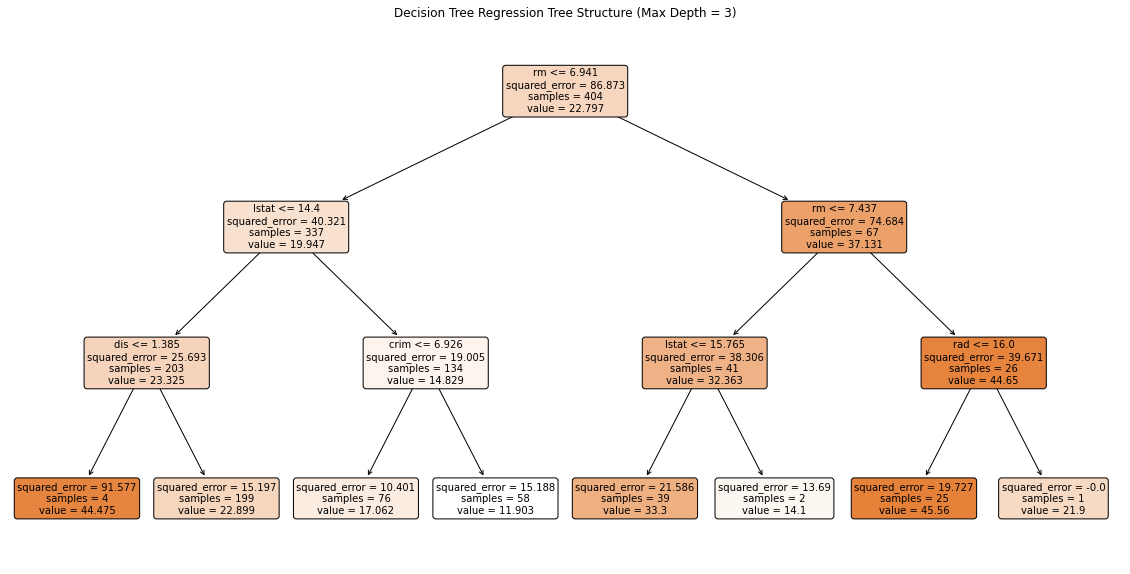

In [24]:
# Visualize the tree using plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regression Tree Structure (Max Depth = 3)")
plt.show()

In [ ]:
# Export the Tree using graphviz (for a more detailed view)
# Export the tree to a DOT file
#dot_data = export_graphviz(
 #   dt_model,
 #   out_file=None,
 #   feature_names=X.columns,
 #   filled=True,
 #   rounded=True,
 #   special_characters=True,
#)

# Visualize the tree using graphviz
#graph = graphviz.Source(dot_data)
#graph.render("decision_tree_depth_3")  # Saves the tree to a file (optional)
#graph.view()  # Opens the tree in a viewer

## Step 4: Random Forest Model 

In [25]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [26]:
# Calculate evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)

Random Forest Regression Metrics:
Mean Squared Error (MSE): 7.901513892156864
Root Mean Squared Error (RMSE): 2.8109631609391226
R-squared (R2): 0.8922527442109116


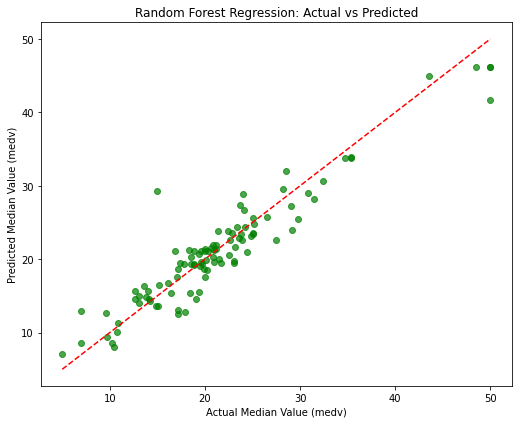

In [27]:
# Visualize the Random Forest Regression
# Plot predicted vs actual values for both models
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Median Value (medv)")
plt.ylabel("Predicted Median Value (medv)")
plt.title("Random Forest Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()

# 2) Classification Example

#### Problem Statement
The Breast Cancer dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast masses. These features describe characteristics of the cell nuclei present in the image, such as radius, texture, perimeter, area, smoothness, compactness, concavity, and symmetry. The goal is to predict whether a tumor is malignant (1) or benign (0) based on these features. This is a classic binary classification problem in machine learning, with significant implications for medical diagnosis and treatment planning.

#### Aim of the Analysis
The aim of this analysis is to develop and evaluate machine learning models that can accurately classify breast tumors as malignant or benign based on the given features. By leveraging various classification algorithms, we aim to identify the best-performing model that can assist healthcare professionals in making informed decisions about patient care.

#### Objectives
1) Data Preparation:

- Load and preprocess the dataset.

- Split the data into training and testing sets.

- Standardize the features to ensure all features are on the same scale.

2) Model Development:

- Train multiple classification models, including:

- Logistic Regression

- Decision Tree Classifier

- K-Nearest Neighbors (KNN)

- Support Vector Classifier (SVC)

- Random Forest Classifier

3) Model Evaluation:

Evaluate the performance of each model using metrics such as:

- Accuracy: Percentage of correct predictions.

- Precision: Percentage of true positives among predicted positives.

- Recall: Percentage of true positives among actual positives.

- F1-Score: Harmonic mean of precision and recall.

- AUC - ROC curves

Generate classification reports and confusion matrices for each model.

4) Comparison of Models:

Compare the performance of all models to identify the best-performing one.

- Analyze the strengths and weaknesses of each model.

5) Feature Importance:

Identify the most important features contributing to the classification decision (especially for Decision Tree and Random Forest).

6) Deployment Insights:

Provide actionable insights for healthcare professionals to improve diagnostic accuracy and efficiency.

### Why is this Important?
- Medical Diagnosis: Accurate classification of breast tumors can help in early detection and treatment of breast cancer, potentially saving lives.

- Model Selection: By comparing multiple models, we can identify the most reliable and accurate classifier for this specific problem.

- Feature Insights: Understanding which features contribute most to the classification can help in developing simpler and more interpretable diagnostic tools.

### Expected Outcomes
1) Trained Models:

- Multiple classification models trained on the Breast Cancer dataset.

2) Performance Metrics:

- Evaluation metrics (accuracy, precision, recall, F1-score) for each model.

3) Best Model:

- Identification of the best-performing model based on evaluation metrics.

4) eature Importance:

- Insights into the most important features for classification.

5) ctionable Insights:

- Recommendations for healthcare professionals based on model performance and feature importance.



In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Step 1: Load the Dataset

In [29]:
# Load the dataset
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv"
df = pd.read_csv(data_url, index_col = 0)
df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Id,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,0
1002945,5,4,4,5,7,10.0,3,2,1,0
1015425,3,1,1,1,2,2.0,3,1,1,0
1016277,6,8,8,1,3,4.0,3,7,1,0
1017023,4,1,1,3,2,1.0,3,1,1,0


### Step 2: Understand the Dataset

In [30]:
print("Dataset Shape:", df.shape)  # Check dimensions
print("\nColumn Names:\n", df.columns)  # Inspect column names
print("\nData Types:\n", df.dtypes)  # Check data types
print("\nMissing Values:\n", df.isnull().sum())  # Check for missing values

Dataset Shape: (699, 10)

Column Names:
 Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

Data Types:
 Cl.thickness         int64
Cell.size            int64
Cell.shape           int64
Marg.adhesion        int64
Epith.c.size         int64
Bare.nuclei        float64
Bl.cromatin          int64
Normal.nucleoli      int64
Mitoses              int64
Class                int64
dtype: object

Missing Values:
 Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64


In [31]:
# Step 2: Summarize the Data
print("\nDescriptive Statistics:\n", df.describe())  # Descriptive statistics


Descriptive Statistics:
        Cl.thickness   Cell.size  Cell.shape  Marg.adhesion  Epith.c.size  \
count    699.000000  699.000000  699.000000     699.000000    699.000000   
mean       4.417740    3.134478    3.207439       2.806867      3.216023   
std        2.815741    3.051459    2.971913       2.855379      2.214300   
min        1.000000    1.000000    1.000000       1.000000      1.000000   
25%        2.000000    1.000000    1.000000       1.000000      2.000000   
50%        4.000000    1.000000    1.000000       1.000000      2.000000   
75%        6.000000    5.000000    5.000000       4.000000      4.000000   
max       10.000000   10.000000   10.000000      10.000000     10.000000   

       Bare.nuclei  Bl.cromatin  Normal.nucleoli     Mitoses       Class  
count   683.000000   699.000000       699.000000  699.000000  699.000000  
mean      3.544656     3.437768         2.866953    1.589413    0.344778  
std       3.643857     2.438364         3.053634    1.715078    

### Step 3: Visualize the Data

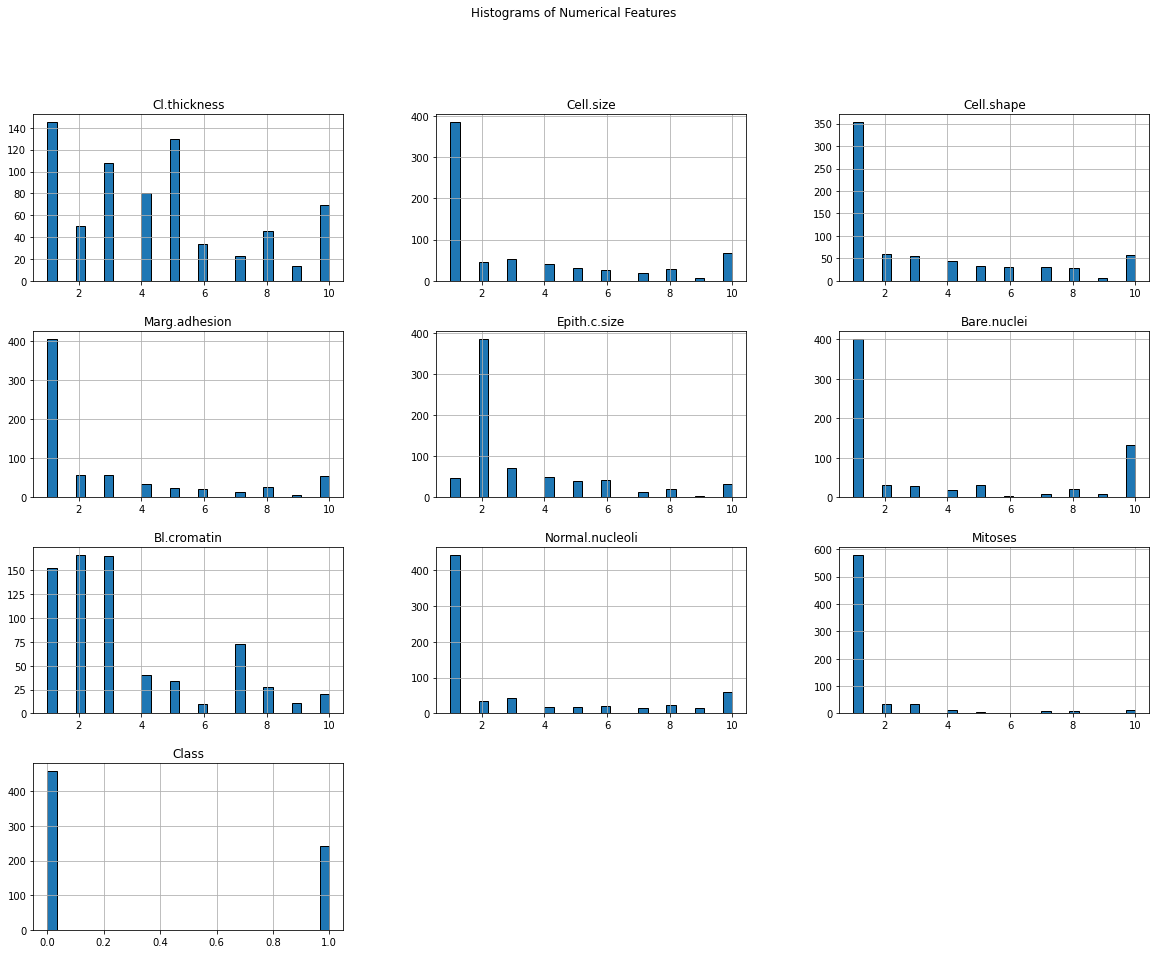

In [32]:
# Histograms for numerical features
df.hist(figsize=(20, 15), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

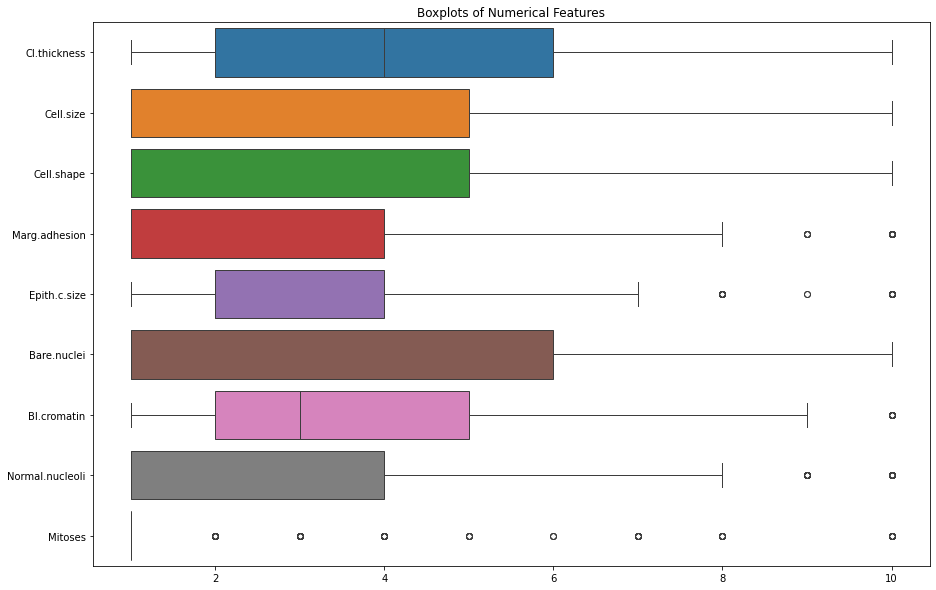

In [33]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop('Class', axis=1), orient="h")
plt.title("Boxplots of Numerical Features")
plt.show()

### Step 2: Prepare the Data

##### Handle Missing information

In [34]:
# Option 1: Drop the missing if its less than 10%

#df_1 = df.dropna(subset=['Bare.nuclei'])

# Option 2: Fill the missing using the variable Mean value for numeric variable only

#df['Bare.nuclei'] = df['Bare.nuclei'].fillna(df['Bare.nuclei'].mean())


# Option 3: Fill with Median (Robust to Outliers) for numeric variable only 

df['Bare.nuclei'] = df['Bare.nuclei'].fillna(df['Bare.nuclei'].median())


# Option 4: Fill with Most Frequent Value (Mode, for categorical-like data)

#df['Class'] = df['Class'].fillna(df['Class'].mode()[0])


# Option 5: Use advance methods like - Predict Missing Values Using K-Nearest Neighbors

#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=3)
#df[['Bare.nuclei']] = imputer.fit_transform(df[['Bare.nuclei']])


In [35]:
# Features (X) and target (y)
X = df.drop('Class', axis=1)  # All columns except 'Class'
y = df['Class']  # Target variable (0 = benign, 1 = malignant)

In [36]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Logistic Regression, KNN, and SVC)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 3: Train and Evaluate Models

In [37]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

#### Logistic Regression

In [38]:
print("Logistic Regression:")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test)

Logistic Regression:
Accuracy: 0.9643
Precision: 0.9762
Recall: 0.9111
F1-Score: 0.9425

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion Matrix:
[[94  1]
 [ 4 41]]
--------------------------------------------------


#### Decision Tree Classifier

In [39]:
print("Decision Tree Classifier:")
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth for simplicity
dt_classifier.fit(X_train, y_train)
evaluate_model(dt_classifier, X_test, y_test)

Decision Tree Classifier:
Accuracy: 0.9286
Precision: 0.8723
Recall: 0.9111
F1-Score: 0.8913

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.87      0.91      0.89        45

    accuracy                           0.93       140
   macro avg       0.91      0.92      0.92       140
weighted avg       0.93      0.93      0.93       140

Confusion Matrix:
[[89  6]
 [ 4 41]]
--------------------------------------------------


#### K-Nearest Neighbors (KNN)

In [40]:
print("K-Nearest Neighbors (KNN):")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

K-Nearest Neighbors (KNN):
Accuracy: 0.9714
Precision: 0.9767
Recall: 0.9333
F1-Score: 0.9545

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

Confusion Matrix:
[[94  1]
 [ 3 42]]
--------------------------------------------------


#### Support Vector Classifier (SVC)

In [41]:
print("Support Vector Classifier (SVC):")
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train, y_train)
evaluate_model(svc, X_test, y_test)

Support Vector Classifier (SVC):
Accuracy: 0.9714
Precision: 0.9767
Recall: 0.9333
F1-Score: 0.9545

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

Confusion Matrix:
[[94  1]
 [ 3 42]]
--------------------------------------------------


#### Random Forest Classifier

In [42]:
print("Random Forest Classifier:")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
evaluate_model(rf_classifier, X_test, y_test)

Random Forest Classifier:
Accuracy: 0.9643
Precision: 0.9545
Recall: 0.9333
F1-Score: 0.9438

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion Matrix:
[[93  2]
 [ 3 42]]
--------------------------------------------------


In [43]:
# Visualise the ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
# Initialize a dictionary to store ROC curve data
roc_data = {}

# Logistic Regression 

y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
auc_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)
roc_data['Logistic Regression'] = (fpr_log_reg, tpr_log_reg, auc_log_reg)


# Decision tree Model 

y_pred_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
roc_data['Decision Tree'] = (fpr_dt, tpr_dt, auc_dt)


# K-Nearest Neighbors (KNN)

y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
roc_data['KNN'] = (fpr_knn, tpr_knn, auc_knn)


# Support Vector Classifier (SVC)

y_pred_prob_svc = svc.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_prob_svc)
auc_svc = roc_auc_score(y_test, y_pred_prob_svc)
roc_data['SVC'] = (fpr_svc, tpr_svc, auc_svc)


# Random Forest Classifier

y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
roc_data['Random Forest'] = (fpr_rf, tpr_rf, auc_rf)

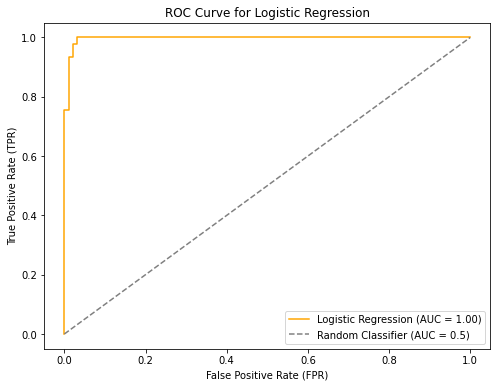

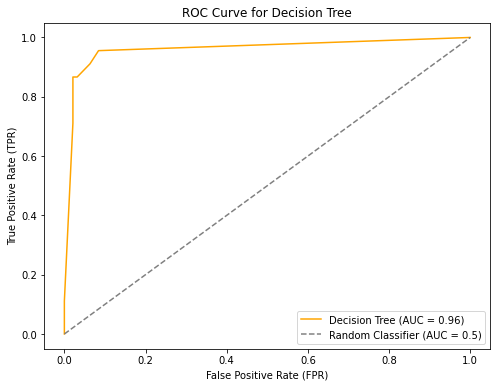

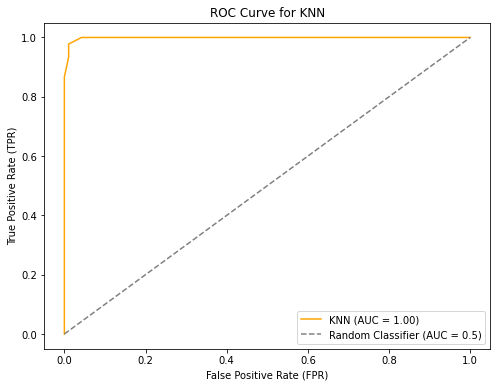

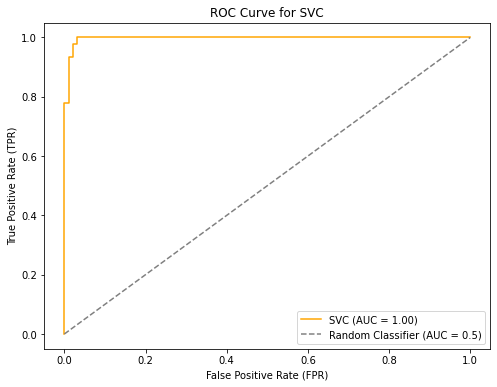

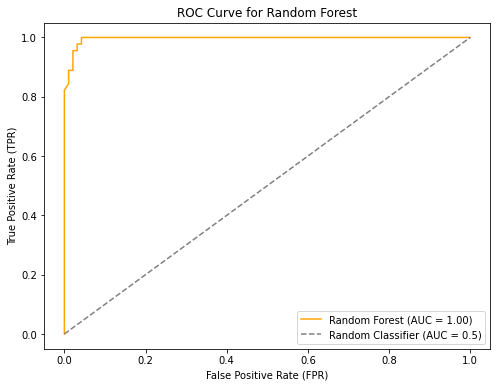

In [44]:
import matplotlib.pyplot as plt

# Plot ROC Curve for each model separately
for model, (fpr, tpr, auc) in roc_data.items():
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    plt.plot(fpr, tpr, label=f"{model} (AUC = {auc:.2f})", color="orange")

    # Plot the diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.5)")

    # Add labels and title
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(f"ROC Curve for {model}")
    plt.legend(loc="lower right")
    #plt.grid(True)
    plt.show()  # Display each ROC curve separately


### Step 4: Model Deployment - Save the Best performing Model 

In [45]:
# Import joblib for saving the model
import joblib

# Save the Random Forest model to a file
model_filename = "best_model_random_forest_cancer_study.pkl"
joblib.dump(rf_classifier, model_filename)

print(f"Model saved to {model_filename}")

Model saved to best_model_random_forest_cancer_study.pkl
